# Assignment 22

Found 1766 test images.


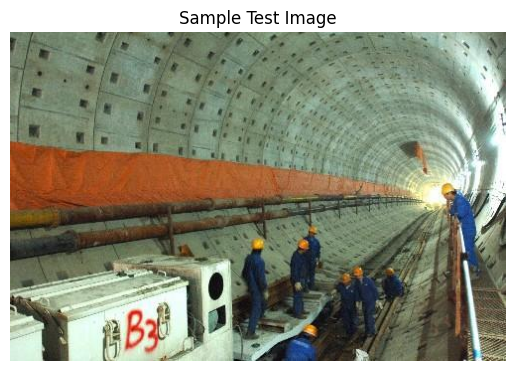


image 1/1 c:\Users\Liam\Projects\DataScienceLessons\Portfolio\..\datasets\construction\test\005298_jpg.rf.647d148af5d961d8bbc041f172247170.jpg: 448x640 7 persons, 36.1ms
Speed: 1.4ms preprocess, 36.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


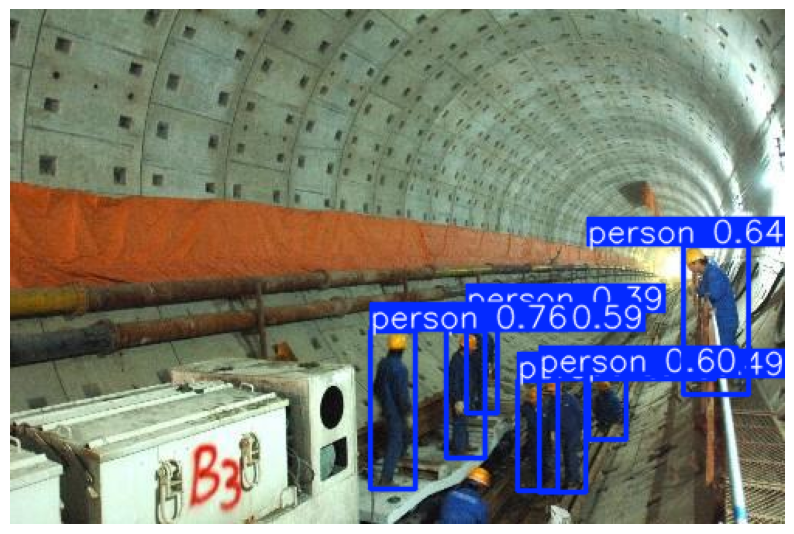

Object: person, Coordinates: [232.70159912109375, 207.55130004882812, 261.17315673828125, 309.4505310058594], Confidence: 0.76
Object: person, Coordinates: [434.4683837890625, 152.70008850097656, 476.3133239746094, 248.3970184326172], Confidence: 0.64
Object: person, Coordinates: [341.77264404296875, 235.53787231445312, 371.5289306640625, 311.2925109863281], Confidence: 0.6
Object: person, Coordinates: [281.3697814941406, 207.84597778320312, 306.23101806640625, 289.2324523925781], Confidence: 0.59
Object: person, Coordinates: [373.3146667480469, 237.3459930419922, 397.81341552734375, 277.2591552734375], Confidence: 0.49
Object: person, Coordinates: [327.09112548828125, 239.5469512939453, 353.3649597167969, 310.2803955078125], Confidence: 0.45
Object: person, Coordinates: [294.6957702636719, 195.39747619628906, 314.125732421875, 260.7639465332031], Confidence: 0.39


In [16]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Set the path to your test images folder
images_folder = '../datasets/construction/test/'

# List image files in the test folder
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png'))]
print(f"Found {len(image_files)} test images.")

# Show the first test image
first_image_path = os.path.join(images_folder, image_files[0])
image = cv2.imread(first_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Sample Test Image')
plt.show()

# Load YOLOv8 model (pretrained on COCO, works for general objects)
model = YOLO("yolov8n.pt")  # or yolov8m.pt for better accuracy

# Predict objects in the first test image
results = model.predict(source=first_image_path, conf=0.25, iou=0.4)

# Plotting the predicted results
plot = results[0].plot()

# Convert the plot from BGR to RGB
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

# Create a larger figure size
plt.figure(figsize=(10, 10))  
plt.imshow(plot)
plt.axis('off')
plt.show()

# Print detected objects
for box in results[0].boxes:
    class_id = results[0].names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    conf = round(box.conf[0].item(), 2)
    print(f"Object: {class_id}, Coordinates: {cords}, Confidence: {conf}")

### Conculsion
Looking at the first image in my dataset, it seems yolo has found 7 people, while i can count 8. It looks like it missed the person in the front.